**<center>CAP-400 - Visualização e Análise Computacional de Séries Temporais</center>**

**<center>Professor Dr. Reinaldo Rosa</center>**

# <center>Estudo: Campo Gradiente, Módulo, Fase e Entropia de Shannon</center>

**<center>André Ricardo Fazanaro Martinon</center>**

**<center>20 de janeiro de 2020</center>**

## 1. Introdução

<https://en.wikipedia.org/wiki/Entropy_(information_theory)>

A biblioteca scikit-image fornece o método **shannon_entropy**. Mas ao aplicar diretamente este método em cada snapshot do CML obtemos, para quase todos os datasets, uma série temporal constante.

Verificando a [documentação](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.shannon_entropy), podemos constatar que o método calcula a entropia de Shannon de uma imagem. Retornando um valor medido em bits.

No entanto não estamos fazendo o cálculo da entropia a partir de uma imagem, mas dos módulos e fases do campo gradiente de cada snapshot.

## 2. Cálculo do campo gradiente

A seguir demonstraremos a obtenção do campo gradiente de uma grade 2D.

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np

As classes e métodos do pacote cml fazem parte da implementação de mapas acoplados desenvolvida para o trabalho e resolução da lista de exercícios da disciplina CAP-400.

In [2]:
from cml.initial_conditions import RandomInitialCondition, GaussianInitialCondition
from cml.plot import plot_lattice

Para testar o cálculo do campo iremos criar duas grades, uma com condições iniciais aleatórias e outra com condições iniciais gaussiana.

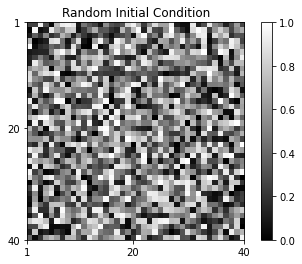

In [3]:
random = RandomInitialCondition(shape=(40, 40,))
random.generate()
_ = plot_lattice(random.lattice, str(random))

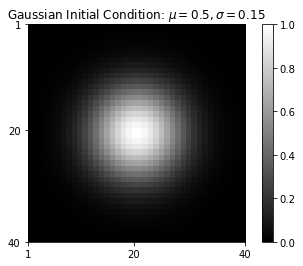

In [4]:
gaussian = GaussianInitialCondition(shape=(40, 40,))
gaussian.generate()
_ = plot_lattice(gaussian.lattice, str(gaussian))

Para calcular o campo gradiente destas grades iremos utilizar o método **gradient** da biblioteca numpy.

A documentação do método gradiente pode ser conferida a seguir:

In [5]:
help(np.gradient)

Help on function gradient in module numpy:

gradient(f, *varargs, axis=None, edge_order=1)
    Return the gradient of an N-dimensional array.
    
    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:
    
        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
        

Nesta documentação não há indicação da ordem de retorno do método.

**O método gradient do Matlab retorna os gradientes na ordem X, Y etc. Mas no numpy a ordem de criação de um array é sempre linhas e depois colunas, como podemos conferir abaixo**:

In [6]:
np.ndarray(shape=(3,2), dtype=float)

array([[0. , 0.2],
       [0.4, 0.6],
       [0.8, 1. ]])

**É bem provável que o retorno do método gradient no numpy seja Y, X**.

Podemos conferir calculando, e plotando, o campo gradiente da grade gaussiana.

In [7]:
V, U = np.gradient(np.flip(gaussian.lattice.u, 0))

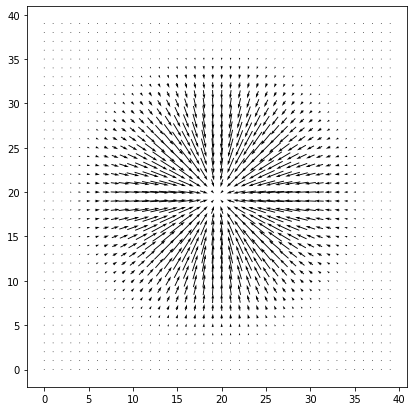

In [8]:
X, Y = np.meshgrid(np.arange(0, gaussian.lattice.shape[1], 1),
                   np.arange(0, gaussian.lattice.shape[0], 1))

fig, ax = plt.subplots(figsize=(7, 7))
ax.quiver(X, Y, U, V, units='y', pivot='mid')
ax.set_aspect('equal')

Para a grade aleatória temos o seguinte campo gradiente:

In [9]:
V, U = np.gradient(np.flip(random.lattice.u, 0))

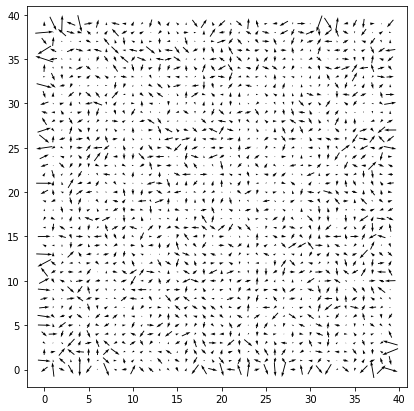

In [10]:
X, Y = np.meshgrid(np.arange(0, random.lattice.shape[1], 1),
                   np.arange(0, random.lattice.shape[0], 1))

fig, ax = plt.subplots(figsize=(7, 7))
ax.quiver(X, Y, U, V, units='x', pivot='mid')
ax.set_aspect('equal')

Para obtermos uma melhor visualização dos vetores, podemos aumentar o intervalo dos pontos que serão plotados:

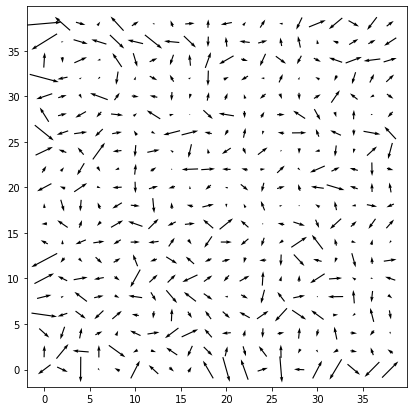

In [11]:
X, Y = np.meshgrid(np.arange(0, random.lattice.shape[1], 1),
                   np.arange(0, random.lattice.shape[0], 1))

fig, ax = plt.subplots(figsize=(7, 7))
ax.quiver(X[::2, ::2], Y[::2, ::2], U[::2, ::2], V[::2, ::2], units='x', pivot='mid')
ax.set_aspect('equal')

## 3. Cálculo dos módulos e fases do campo gradiente

O módulo das direções U e V da cada ponto da grade pode ser obtido através:

$\mathopen|\overrightarrow{UV}\mathclose| = \sqrt{U^2 + V^2}$

E a fase das direções U e V, ou o ângulo formado entre U e V:

$\theta = \arctan \frac{V}{U}$

No numpy existem dois métodos para calcular o inverso da tangente: arctan e arctan2.

A diferença entre eles é a faixa dos ângulos retornados:

* arctan: $[-\frac{\pi}{2}, \frac{\pi}{2}]$
* arctan2: $[-\pi, \pi]$

In [12]:
def calculate_modulus_and_theta(U, V):
    modulus = np.sqrt(U**2 + V**2)
    theta = np.arctan2(V, U)

    return modulus, theta

Agora podemos calcular os respectivos módulos e fases das grades aleatória e gaussiana:

In [13]:
from scipy.stats import describe

V, U = np.gradient(np.flip(random.lattice.u, 0))
random_modulus, random_theta = calculate_modulus_and_theta(U, V)

V, U = np.gradient(gaussian.lattice.u)
gaussian_modulus, gaussian_theta = calculate_modulus_and_theta(U, V)

E verificar as faixas de valores retornados:

In [14]:
describe(random_modulus, axis=None)

DescribeResult(nobs=1600, minmax=(0.0037480652545577847, 0.9844502388938415), mean=0.27862896318676744, variance=0.021589016170100398, skewness=0.9511362466185695, kurtosis=1.8980096696297215)

In [15]:
describe(random_theta, axis=None)

DescribeResult(nobs=1600, minmax=(-3.136863970068819, 3.140109916872925), mean=-0.02900466696964102, variance=3.2991226708558186, skewness=-0.006089032419265225, kurtosis=-1.1913203137019441)

In [16]:
describe(gaussian_modulus, axis=None)

DescribeResult(nobs=1600, minmax=(1.5688597773927844e-05, 0.10252169312721654), mean=0.028595616844798038, variance=0.001118080963152105, skewness=1.0332942159641443, kurtosis=-0.385133508138888)

In [17]:
describe(gaussian_theta, axis=None)

DescribeResult(nobs=1600, minmax=(-3.1221967184619155, 3.1221967184619155), mean=1.4210854715202004e-16, variance=3.265580799002621, skewness=-1.928309825227639e-16, kurtosis=-1.2177670006963912)

## 4. Cálculo da entropia de Shannon

A seguir iremos calcular a entropia utilizando o método **shannon_entropy**:

In [18]:
from skimage.measure import shannon_entropy

In [19]:
help(shannon_entropy)

Help on function shannon_entropy in module skimage.measure.entropy:

shannon_entropy(image, base=2)
    Calculate the Shannon entropy of an image.
    
    The Shannon entropy is defined as S = -sum(pk * log(pk)),
    where pk are frequency/probability of pixels of value k.
    
    Parameters
    ----------
    image : (N, M) ndarray
        Grayscale input image.
    base : float, optional
        The logarithmic base to use.
    
    Returns
    -------
    entropy : float
    
    Notes
    -----
    The returned value is measured in bits or shannon (Sh) for base=2, natural
    unit (nat) for base=np.e and hartley (Hart) for base=10.
    
    References
    ----------
    .. [1] `https://en.wikipedia.org/wiki/Entropy_(information_theory) <https://en.wikipedia.org/wiki/Entropy_(information_theory)>`_
    .. [2] https://en.wiktionary.org/wiki/Shannon_entropy
    
    Examples
    --------
    >>> from skimage import data
    >>> from skimage.measure import shannon_entropy
    >>> sha

In [20]:
shannon_entropy(random_modulus)

10.643856189774725

In [21]:
shannon_entropy(random_theta)

10.643856189774725

In [22]:
shannon_entropy(random.lattice.u)

10.643856189774725

In [23]:
shannon_entropy(gaussian_modulus)

8.97916258039702

In [24]:
shannon_entropy(gaussian_theta)

10.50285232743179

In [25]:
shannon_entropy(gaussian.lattice.u)

8.109544046100662

Como podemos verificar para a grade aleatória o valor da entropia é igual para os módulos, fases e a própria grade. Já para a grade gaussiana os valores são diferentes.

Quando aplicamos para o CML o resultado não parece ser o esperado:

In [26]:
def plot_shannon_entropies(snapshots):
    entropies = []
    modulus_entropies = []
    phases_entropies = []
    for snapshot in snapshots:
        entropies.append(shannon_entropy(snapshot.u))
        V, U = np.gradient(np.flip(snapshot.u, 0))
        modulus = np.sqrt(U**2 + V**2)
        theta = np.arctan2(V, U)
    
        modulus_entropies.append(shannon_entropy(modulus))
        phases_entropies.append(shannon_entropy(theta))

    plt.plot(entropies)
    plt.plot(modulus_entropies)
    plt.plot(phases_entropies)
    plt.legend(labels=['Lattice', 'Modulus', 'Phases'])

In [27]:
from cml import ToroidalBoundaryCondition, SteadyBoundaryCondition, LogisticMap, FourNeighborCoupling, \
    Evolution, CML

datasetcml1 = CML(RandomInitialCondition(),
                  SteadyBoundaryCondition(0.0),
                  LogisticMap(3.9),
                  FourNeighborCoupling(0.5),
                  grid_size=40)

datasetcml1_evolution = Evolution(datasetcml1, iterations=1024)
datasetcml1_evolution.run()

datasetcml2 = CML(GaussianInitialCondition(),
                  SteadyBoundaryCondition(0.0),
                  LogisticMap(3.9),
                  FourNeighborCoupling(0.5),
                  grid_size=40)

datasetcml2_evolution = Evolution(datasetcml2, iterations=1024)
datasetcml2_evolution.run()

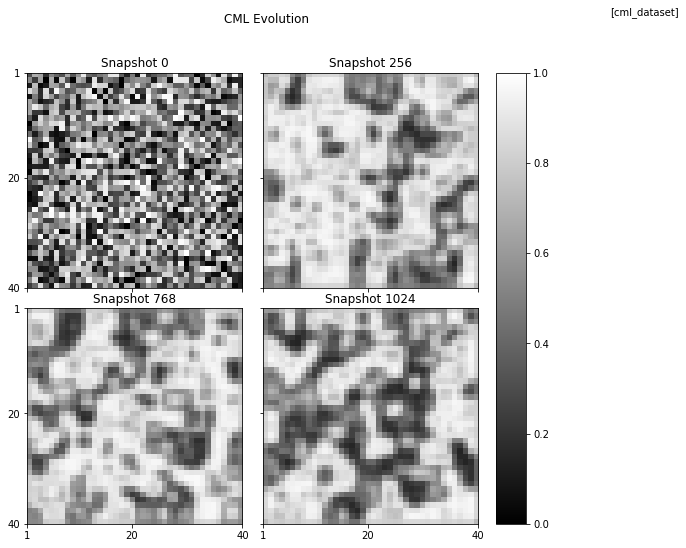

In [28]:
datasetcml1_evolution.plot(show=True)

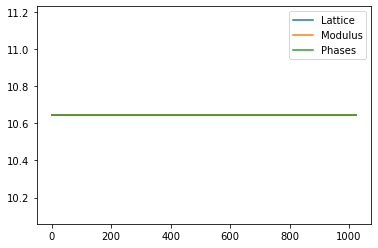

In [29]:
plot_shannon_entropies(datasetcml1_evolution.snapshots)

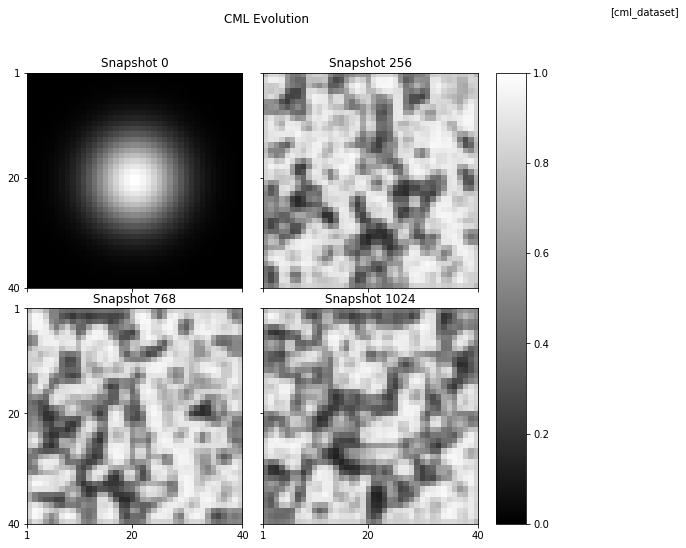

In [30]:
datasetcml2_evolution.plot(show=True)

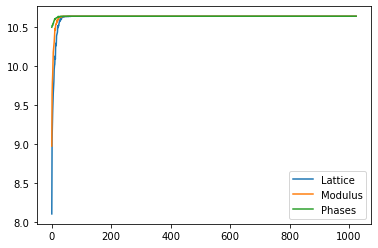

In [31]:
plot_shannon_entropies(datasetcml2_evolution.snapshots)

Na maioria dos datasets temos esse mesmo comportamento. Desta forma, será que:

### Devemos realizar algum tratamento nos valores dos módulos e fases?

Na dissertação do Rubens Sautter, existe uma seção sobre a entropia:
    
> The entropy is a measurement of a random variable uncertainty. Here, we adopted the Shannon entropy (shown equation 4.16), as this approach were already applied to morphology providing reliable results( FERRARI et al. , 2015).
> 
> Assuming the galaxy flux as the random variable, this measurement shows the heterogeneity degree in pixel distribution.
>
> Notice that in equation 4.16, the flux intensity (I k ) is discretized in a set of K bins. As described in other morphological parameters, we apply an objective function to determine the best number of sets (K). Although different from other methods, there was no concordance between on the optimal value for K. To solve this problem, we selected the average of best K for each objective function, which is K = 130 bins.


Fazendo uma busca no stackoverflow encontramos a seguinte dúvida: [What is the entropy of an image and how is it calculated?
](https://stackoverflow.com/questions/50313114/what-is-the-entropy-of-an-image-and-how-is-it-calculated).

Onde, além da recomendação da biblioteca scikit-image, o seguinte código é apresentado:

In [32]:
def entropy(img, bins=256):
    marg = np.histogramdd(np.ravel(img), bins=bins)[0]/img.size
    marg = list(filter(lambda p: p > 0, np.ravel(marg)))
    return -np.sum(np.multiply(marg, np.log2(marg)))

Vamos trocar o método shannon_entropy pelo método entropy, implementado acima e comparar os resultados dos dois datasets do CML.

In [33]:
def plot_entropies(snapshots, bins=256):
    entropies = []
    modulus_entropies = []
    phases_entropies = []
    for snapshot in snapshots:
        entropies.append(entropy(snapshot.u, bins=bins))
        V, U = np.gradient(np.flip(snapshot.u, 0))
        modulus = np.sqrt(U**2 + V**2)
        theta = np.arctan2(V, U)
    
        modulus_entropies.append(entropy(modulus, bins=bins))
        phases_entropies.append(entropy(theta, bins=bins))

    plt.plot(entropies)
    plt.plot(modulus_entropies)
    plt.plot(phases_entropies)
    plt.legend(labels=['Lattice', 'Modulus', 'Phases'])

## 5. Comparação dos métodos de cálculo da entropia no CML

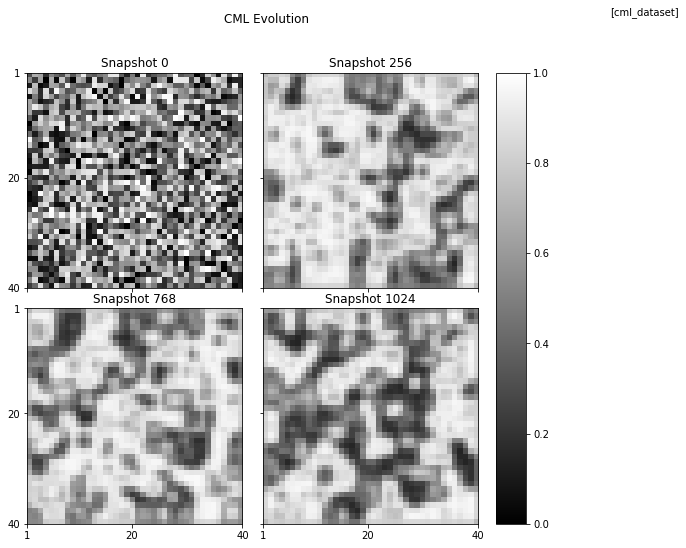

In [34]:
datasetcml1_evolution.plot(show=True)

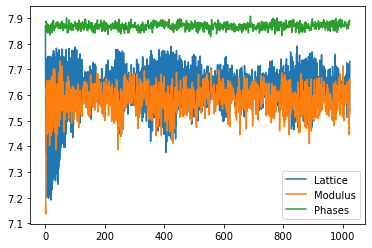

In [35]:
plot_entropies(datasetcml1_evolution.snapshots, bins=256)

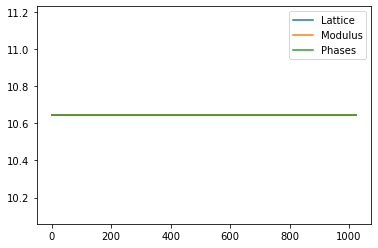

In [36]:
plot_shannon_entropies(datasetcml1_evolution.snapshots)

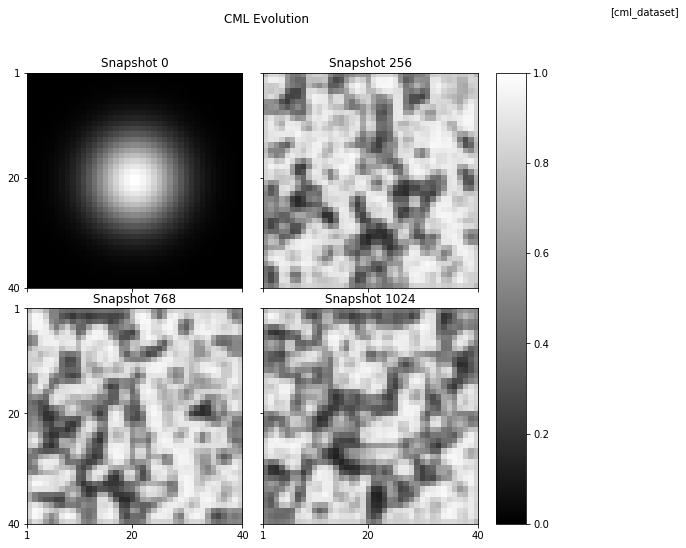

In [37]:
datasetcml2_evolution.plot(show=True)

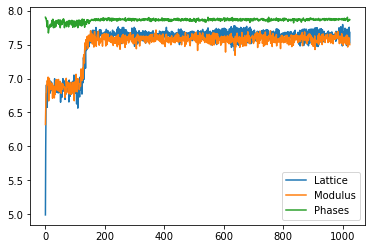

In [38]:
plot_entropies(datasetcml2_evolution.snapshots, bins=256)

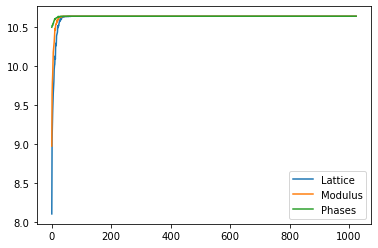

In [39]:
plot_shannon_entropies(datasetcml2_evolution.snapshots)

## 6. Comparação do cálculo da entropia em imagens

In [40]:
from skimage import data, io, color

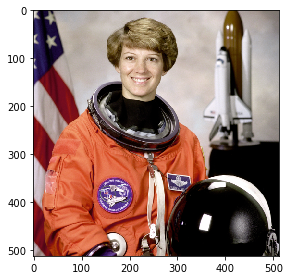

In [41]:
io.imshow(data.astronaut())

In [42]:
shannon_entropy(data.astronaut())

7.471824162922915

In [43]:
entropy(data.astronaut())

7.471824162922914

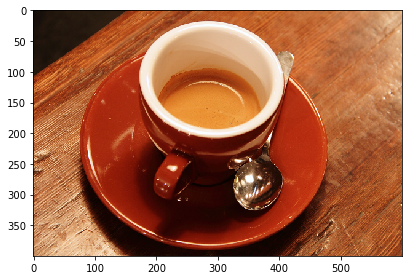

In [44]:
io.imshow(data.coffee())

In [45]:
shannon_entropy(data.coffee())

7.811580760316376

In [46]:
entropy(data.coffee())

7.811580760316376

## 7. Conclusão

Podemos concluir que os métodos **shannon_entropy** (scikit-image) e **entropy** (implementado neste estudo) obtém a mesma entropia quando aplicados em imagens.

Mas quando aplicamos no CML, o método **entropy** mostrou-se mais adequado. Uma vez que não estamos tratando imagens e sim matrizes com faixas de valores distintos do RGB.

E finalmente na aplicação do método **entropy** devemos ajustar adequadamente a quantidade de bins nos quais a faixa de valores serão divididas.